In [738]:
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [739]:
loyalty_members = pandas.read_csv("../dataset/loyalty_members_2000.csv")
loyalty_points_activity = pandas.read_csv("../dataset/loyalty_points_activity_2000.csv")
online_customers = pandas.read_csv("../dataset/online_customers_2000.csv")
online_orders = pandas.read_csv("../dataset/online_orders_2000.csv")
pos_products = pandas.read_csv("../dataset/pos_products_1000.csv")
pos_transactions = pandas.read_csv("../dataset/pos_transactions_header_1000_v2.csv")
pos_transactions_line = pandas.read_csv("../dataset/pos_transactions_line_2000.csv")

In [740]:
print(loyalty_members.info())
print(loyalty_members.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loyalty_member_id  2000 non-null   int64 
 1   enrolment_date     2000 non-null   object
 2   first_name         2000 non-null   object
 3   last_name          2000 non-null   object
 4   email              2000 non-null   object
 5   date_of_birth      2000 non-null   object
 6   gender             2000 non-null   object
 7   primary_store_id   2000 non-null   int64 
 8   consent_marketing  2000 non-null   bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 127.1+ KB
None
loyalty_member_id    0
enrolment_date       0
first_name           0
last_name            0
email                0
date_of_birth        0
gender               0
primary_store_id     0
consent_marketing    0
dtype: int64


In [741]:
print(loyalty_points_activity.info())
print(loyalty_points_activity.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   points_txn_id      2000 non-null   int64 
 1   loyalty_member_id  2000 non-null   int64 
 2   source_system      2000 non-null   object
 3   source_reference   2000 non-null   int64 
 4   activity_type      2000 non-null   object
 5   points             2000 non-null   int64 
 6   activity_datetime  2000 non-null   object
dtypes: int64(4), object(3)
memory usage: 109.5+ KB
None
points_txn_id        0
loyalty_member_id    0
source_system        0
source_reference     0
activity_type        0
points               0
activity_datetime    0
dtype: int64


In [742]:
print(online_customers.info())
print(online_customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   online_customer_id  2000 non-null   int64  
 1   first_name          2000 non-null   object 
 2   last_name           2000 non-null   object 
 3   email               2000 non-null   object 
 4   phone               2000 non-null   object 
 5   city                2000 non-null   object 
 6   loyalty_member_id   1230 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.5+ KB
None
online_customer_id      0
first_name              0
last_name               0
email                   0
phone                   0
city                    0
loyalty_member_id     770
dtype: int64


In [743]:
print(online_customers.info())
print(online_customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   online_customer_id  2000 non-null   int64  
 1   first_name          2000 non-null   object 
 2   last_name           2000 non-null   object 
 3   email               2000 non-null   object 
 4   phone               2000 non-null   object 
 5   city                2000 non-null   object 
 6   loyalty_member_id   1230 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.5+ KB
None
online_customer_id      0
first_name              0
last_name               0
email                   0
phone                   0
city                    0
loyalty_member_id     770
dtype: int64


In [744]:
print(pos_transactions_line.info())
print(pos_transactions_line.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pos_receipt_id  2000 non-null   int64  
 1   line_number     2000 non-null   int64  
 2   product_id      2000 non-null   int64  
 3   quantity        2000 non-null   int64  
 4   unit_price      2000 non-null   float64
 5   line_discount   2000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 93.9 KB
None
pos_receipt_id    0
line_number       0
product_id        0
quantity          0
unit_price        0
line_discount     0
dtype: int64


In [745]:

print(pos_transactions.info())
print(pos_transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store_id           1000 non-null   int64  
 1   trans_datetime     1000 non-null   object 
 2   staff_id           1000 non-null   int64  
 3   payment_type       1000 non-null   object 
 4   order_channel      1000 non-null   object 
 5   loyalty_member_id  633 non-null    float64
 6   Unnamed: 6         0 non-null      float64
 7   pos_receipt_id     1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
None
store_id                0
trans_datetime          0
staff_id                0
payment_type            0
order_channel           0
loyalty_member_id     367
Unnamed: 6           1000
pos_receipt_id          0
dtype: int64


In [746]:

print(pos_products.info())
print(pos_products.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   subcategory     1000 non-null   object 
 4   size            356 non-null    object 
 5   unit_cost       1000 non-null   float64
 6   list_price      1000 non-null   float64
 7   is_active       1000 non-null   bool   
 8   pos_receipt_id  1000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 63.6+ KB
None
product_id          0
product_name        0
category            0
subcategory         0
size              644
unit_cost           0
list_price          0
is_active           0
pos_receipt_id      0
dtype: int64


In [747]:
# 1. Ensure the column is datetime (using dayfirst=True to avoid errors)
pos_transactions["trans_datetime"] = pandas.to_datetime(pos_transactions["trans_datetime"], dayfirst=True)
online_orders["order_datetime"] = pandas.to_datetime(online_orders["order_datetime"],dayfirst=True)
# 2. Extract the hour (0-23)
hours = pos_transactions["trans_datetime"].dt.hour
hours_online = online_orders["order_datetime"].dt.hour
month = pos_transactions["trans_datetime"].dt.month
month_online = online_orders["order_datetime"].dt.month

# 3. Define the bin edges and labels
# Bins: 0-6, 6-12, 12-18, 18-24
bins = [0, 6, 12, 18, 24]
labels = ['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-24:00']
month_bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

# 4. Create the range column
# right=False means the range is [start, end), so 06:00 falls into the second bin
pos_transactions["time_range"] = pandas.cut(hours, bins=bins, labels=labels, right=False)
online_orders["time_range"] = pandas.cut(hours_online,bins=bins,labels=labels,right=False)
pos_transactions['month'] = pandas.cut(month,bins=month_bins,labels=month_labels,right=True,ordered=False)


In [748]:
del pos_transactions["Unnamed: 6"]

In [749]:
# Merging Datasets
# POS_Transactions and Loyalty_Members on loyalty_member_id creates a dataset of loyal members with their transactions
# Online_orders and Online Customers on online_customer_id creates a dataset of online customers with their online orders
# Loyalty_members and Loyalty Points on loyalty_member_id creates a dataset that tracks the loyal members and their point activity

pos_merged_with_members = pos_transactions.merge(right=loyalty_members,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
online_merged = online_customers.merge(right=online_orders,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
loyalty_merged = loyalty_members.merge(right=loyalty_points_activity,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
pos_transactions_line_merged = pos_transactions.merge(right=pos_transactions_line,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
line_products = pos_products.merge(right=pos_transactions_line,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)

In [750]:
pos_transactions_line_merged.drop_duplicates()
pos_transactions_line_merged.to_csv("../results/check.csv",index=False)

In [751]:
pos_transactions_line_merged.head()

,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month,line_number,product_id,quantity,unit_price,line_discount
0,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,2,115,1,4.84,0.10
1,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,811,1,1.84,0.50
2,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,32,4,5.50,0.25
3,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,5,755,1,4.55,0.00
4,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,4,649,3,2.59,0.10


In [752]:
# Cleaning Data: Removing null values
pos_merged_with_members.dropna()
online_merged.dropna()
loyalty_merged.dropna()

,loyalty_member_id,enrolment_date,first_name,last_name,email,date_of_birth,gender,primary_store_id,consent_marketing,points_txn_id,source_system,source_reference,activity_type,points,activity_datetime
0,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70069,ONLINE,82647,Redeem,-26,25/04/2024 23:35
1,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70188,ONLINE,94176,Redeem,-48,16/04/2024 20:22
2,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70328,ONLINE,83068,Adjust,2,13/02/2024 19:02
3,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,71390,ONLINE,82034,Earn,21,24/02/2024 15:27
4,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,71996,POS,84674,Earn,47,28/02/2024 13:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,70670,ONLINE,92563,Redeem,-17,26/03/2024 20:49
1996,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,70791,ONLINE,90556,Adjust,-16,19/01/2024 10:32
1997,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,71079,ONLINE,88591,Adjust,4,10/01/2024 20:29
1998,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,71136,ONLINE,86775,Adjust,14,25/01/2024 15:09


In [753]:
# In order to deal with the missing data for the store_id we randomly allocate store_ids to each transaction
import random 
random.seed(42)
updated_online_orders = online_orders.copy()
updated_online_orders['store_id'] = updated_online_orders.apply(lambda _: random.randint(1,5),axis=1)
online_orders = updated_online_orders
updated_online_orders.to_csv('../dataset/updated_online_orders.csv',index=False)

In [754]:
online_orders.head()

,online_order_id,online_customer_id,order_datetime,order_status,sales_channel,fulfilment_type,store_id,delivery_fee,discount_amount,payment_type,product_id,time_range
0,80001,10125,2024-03-16 00:44:00,Placed,Mobile App,Pickup,1,0.00,1.69,Card,115,00:00-06:00
1,80002,10275,2024-03-03 08:17:00,Completed,Mobile App,Delivery,1,3.02,1.21,Card,755,06:00-12:00
2,80003,10097,2024-03-22 19:37:00,Preparing,Mobile App,Delivery,3,1.91,1.82,Card,33,18:00-24:00
3,80004,10480,2024-03-06 08:08:00,Cancelled,Web,Delivery,2,3.09,1.41,PayPal,28,06:00-12:00
4,80005,10469,2024-03-26 03:01:00,Completed,Mobile App,Delivery,2,2.14,1.07,PayPal,604,00:00-06:00


In [755]:
# Cleaning Data: Removing Duplicate Data
pos_merged_with_members.drop_duplicates()
online_merged.drop_duplicates()
loyalty_merged.drop_duplicates()
loyalty_members.drop_duplicates()
loyalty_points_activity.drop_duplicates()
online_customers.drop_duplicates()
online_orders.drop_duplicates()
pos_products.drop_duplicates()
pos_transactions .drop_duplicates()


,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month
0,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan
1,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar
2,2,2024-01-15 12:47:00,5006,Mobile Wallet,In-Store,3003.0,90433,12:00-18:00,Jan
3,4,2024-01-01 03:38:00,5002,Voucher,In-Store,3001.0,90617,00:00-06:00,Jan
4,4,2024-01-29 17:07:00,5002,Card,In-Store,3003.0,90460,12:00-18:00,Jan
...,...,...,...,...,...,...,...,...,...
995,1,2024-02-25 00:20:00,5004,Voucher,Click-and-Collect,NaN,90632,00:00-06:00,Feb
996,1,2024-02-20 22:01:00,5002,Cash,In-Store,NaN,90368,18:00-24:00,Feb
997,1,2024-01-26 15:28:00,5007,Voucher,Click-and-Collect,3004.0,90189,12:00-18:00,Jan
998,5,2024-01-17 07:34:00,5009,Voucher,In-Store,NaN,90198,06:00-12:00,Jan


In [756]:
# Exporting Datasets
pos_merged_with_members.to_csv("../dataset/pos_merged_with_members.csv",index=False)
online_merged.to_csv("../dataset/online_merged.csv",index=False)
loyalty_merged.to_csv("../dataset/loyalty_merged.csv",index=False)
pos_transactions_line_merged.to_csv("../dataset/pos_transactions_line_products.csv",index=False)


In [757]:
pos_transactions_line_merged.head()

,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month,line_number,product_id,quantity,unit_price,line_discount
0,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,2,115,1,4.84,0.10
1,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,811,1,1.84,0.50
2,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,32,4,5.50,0.25
3,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,5,755,1,4.55,0.00
4,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,4,649,3,2.59,0.10


In [758]:
# How do in-store vs online sales compare by time, product and location?
pos_transactions_line_merged["amount_received"] = (pos_transactions_line_merged["unit_price"] * pos_transactions_line_merged["quantity"]) - pos_transactions_line_merged["line_discount"]   
pos_transactions_line["amount_received"]  = (pos_transactions_line["unit_price"] * pos_transactions_line["quantity"]) - pos_transactions_line["line_discount"]  
# Creating a mapping Series: product_id -> product_name
product_names = (
    pos_products
    .drop_duplicates("product_id")
    .set_index("product_id")["product_name"]
)

# Map product names into the transactions_line dataframe
pos_transactions_line["product_name"] = (
    pos_transactions_line["product_id"].map(product_names)
)

pos_transactions_line_merged["product_name"] = (
    pos_transactions_line_merged["product_id"].map(product_names)
)
 
# (Sales comparison by product)
most_purchased_product = pos_transactions_line.groupby(["product_id","product_name"]).size()
least_purchases_product =pos_transactions_line.groupby(["product_id","product_name"]).size().sort_values(ascending=True).head(5)

pos_products_with_purchase_rate = (pos_transactions_line_merged.drop_duplicates("product_id"))

pos_products_with_purchase_rate["number_of_purchases"] = pos_products_with_purchase_rate["product_id"].map(most_purchased_product)
pos_products_with_purchase_rate.sort_values(by="number_of_purchases",ascending=False).head(5).to_csv("../results/most_purchases_pos_product.csv",index=False)

C:\Users\kumbi\AppData\Local\Temp\ipykernel_25476\1591588667.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_products_with_purchase_rate["number_of_purchases"] = pos_products_with_purchase_rate["product_id"].map(most_purchased_product)


In [759]:
# How do in-store vs online sales compare by time, product and location?
# Creating a mapping Series: product_id -> product_name
product_names = (
    pos_products
    .drop_duplicates("product_id")
    .set_index("product_id")["product_name"]
)

# Mapping product names into the online orders dataframe
online_orders["product_name"] = (
    online_orders["product_id"].map(product_names)
)
most_purchased_product_online = online_orders.groupby(["product_id","product_name"]).size()
least_purchase_product_online = online_orders.groupby(["product_id","product_name"]).size().sort_values(ascending=True).head(5)
pos_products_with_purchase_rate_online = (online_orders.drop_duplicates("product_id"))

# Collect all completed orders only
orders = pos_products_with_purchase_rate_online["order_status"].isin(["Completed","Placed","Preparing"])
# jump = pos_products_with_purchase_rate_online[orders]
# pos_products_with_purchase_rate_online = jump

pos_products_with_purchase_rate_online["number_of_purchases"] = pos_products_with_purchase_rate_online["product_id"].map(
    most_purchased_product)
pos_products_with_purchase_rate_online.sort_values(by="number_of_purchases", ascending=False).head(
    14).to_csv("../results/most_purchases_online_product.csv", index=False)

C:\Users\kumbi\AppData\Local\Temp\ipykernel_25476\101234225.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_products_with_purchase_rate_online["number_of_purchases"] = pos_products_with_purchase_rate_online["product_id"].map(


In [760]:
# (Sales comparison by time)
pos_sales_time_range = pos_products_with_purchase_rate.groupby("time_range").size()
online_sales_time_range = pos_products_with_purchase_rate_online.groupby("time_range").size()

C:\Users\kumbi\AppData\Local\Temp\ipykernel_25476\2466057699.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_sales_time_range = pos_products_with_purchase_rate.groupby("time_range").size()
C:\Users\kumbi\AppData\Local\Temp\ipykernel_25476\2466057699.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  online_sales_time_range = pos_products_with_purchase_rate_online.groupby("time_range").size()


In [761]:
# Printing out the sales by time range
print("POS Sales by Time Range")
for time_range, total in pos_sales_time_range.items():
    print(f"  • {time_range}: {total} purchases")

print("\nOnline Sales by Time Range")
for time_range, total in online_sales_time_range.items():
    print(f"  • {time_range}: {total} purchases")


POS Sales by Time Range
  • 00:00-06:00: 208 purchases
  • 06:00-12:00: 220 purchases
  • 12:00-18:00: 209 purchases
  • 18:00-24:00: 163 purchases

Online Sales by Time Range
  • 00:00-06:00: 158 purchases
  • 06:00-12:00: 140 purchases
  • 12:00-18:00: 171 purchases
  • 18:00-24:00: 158 purchases


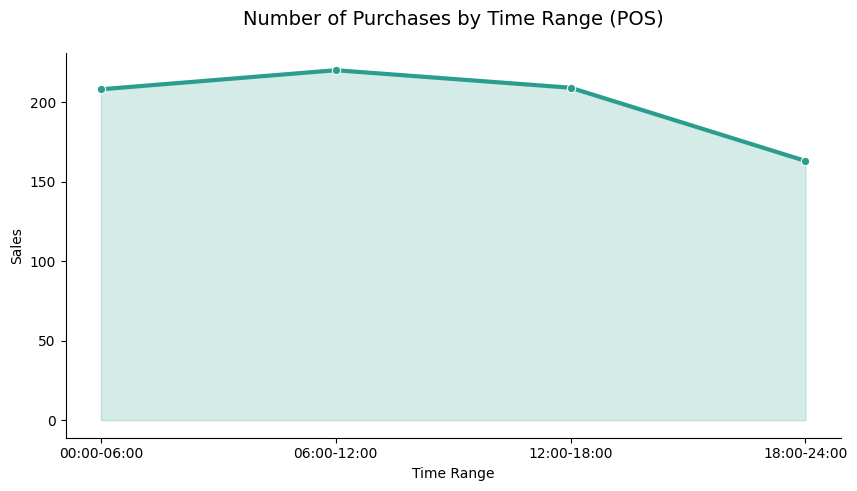

In [762]:
plt.figure(figsize=(10, 5))
# Converting categorical month to numeric for a smooth line
sns.lineplot(x=pos_sales_time_range.index, y=pos_sales_time_range.values, marker='o', color='#2a9d8f', linewidth=3)
plt.fill_between(pos_sales_time_range.index, pos_sales_time_range.values, color='#2a9d8f', alpha=0.2)

plt.title("Number of Purchases by Time Range (POS)", fontsize=14, pad=20)
plt.ylabel("Sales")
plt.xlabel("Time Range")
sns.despine()
plt.show()

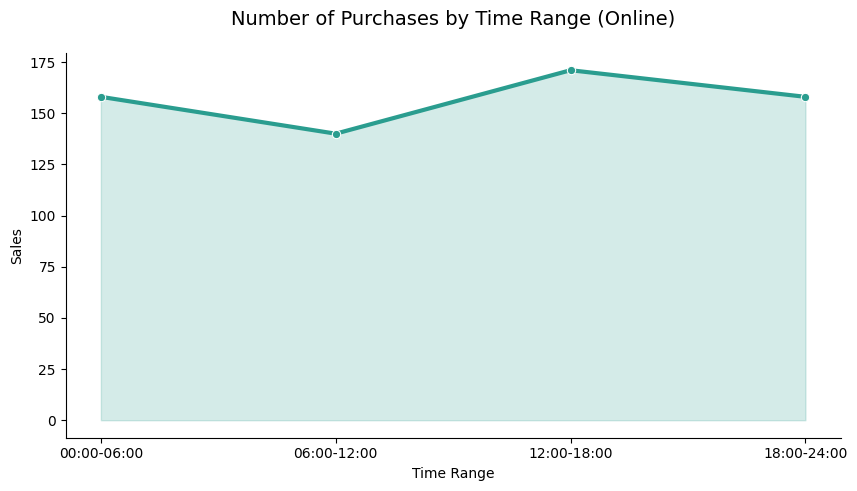

In [763]:
plt.figure(figsize=(10, 5))
# Converting categorical month to numeric for a smooth line
sns.lineplot(x=online_sales_time_range.index, y=online_sales_time_range.values, marker='o', color='#2a9d8f', linewidth=3)
plt.fill_between(online_sales_time_range.index, online_sales_time_range.values, color='#2a9d8f', alpha=0.2)

plt.title("Number of Purchases by Time Range (Online)", fontsize=14, pad=20)
plt.ylabel("Sales")
plt.xlabel("Time Range")
sns.despine()
plt.show()

In [764]:
# Printing out the top 10 products for both POS and Online sales
print("Top 10 POS Products by Number of Purchases")
for i, (product_id, total) in enumerate(most_purchased_product.sort_values(ascending=False).head(10).items(), start=1):
    print(f"{i}. Product Name {product_id}: {total} purchases")

print("\nTop 10 Online Products by Number of Purchases")
for i, (product_id, total) in enumerate(most_purchased_product_online.sort_values(ascending=False).head(10).items(), start=1):
    print(f"{i}. Product Name {product_id}: {total} purchases")


Top 10 POS Products by Number of Purchases
1. Product Name (957, 'Wrap'): 7 purchases
2. Product Name (113, 'Gift Card'): 7 purchases
3. Product Name (671, 'Sandwich'): 6 purchases
4. Product Name (144, 'Wrap'): 6 purchases
5. Product Name (424, 'Pastry'): 6 purchases
6. Product Name (633, 'Flat White'): 6 purchases
7. Product Name (280, 'Mocha L'): 6 purchases
8. Product Name (100, 'Chai L'): 6 purchases
9. Product Name (92, 'Mocha L'): 6 purchases
10. Product Name (460, 'Mug'): 6 purchases

Top 10 Online Products by Number of Purchases
1. Product Name (100, 'Chai L'): 19 purchases
2. Product Name (380, 'Coffee Beans'): 14 purchases
3. Product Name (544, 'Black Tea S'): 10 purchases
4. Product Name (806, 'Pastry'): 10 purchases
5. Product Name (144, 'Wrap'): 10 purchases
6. Product Name (821, 'Wrap'): 10 purchases
7. Product Name (633, 'Flat White'): 10 purchases
8. Product Name (371, 'Green Tea'): 10 purchases
9. Product Name (703, 'Flat White M'): 9 purchases
10. Product Name (227, 

In [765]:
# Printing out the top 10 products for both POS and Online sales
print("Top 10 POS Products by Number of Purchases")
for i, (product_id, total) in enumerate(least_purchases_product.items(), start=1):
    print(f"{i}. Product Name {product_id}: {total} purchases")

print("\nTop 10 Online Products by Number of Purchases")
for i, (product_id, total) in enumerate(least_purchase_product_online.items(), start=1):
    print(f"{i}. Product Name {product_id}: {total} purchases")


Top 10 POS Products by Number of Purchases
1. Product Name (4, 'Chai L'): 1 purchases
2. Product Name (787, 'Mug'): 1 purchases
3. Product Name (784, 'Tumbler'): 1 purchases
4. Product Name (781, 'Wrap'): 1 purchases
5. Product Name (780, 'Cake'): 1 purchases

Top 10 Online Products by Number of Purchases
1. Product Name (999, 'Flat White L'): 1 purchases
2. Product Name (41, 'Wrap'): 1 purchases
3. Product Name (42, 'Black Tea L'): 1 purchases
4. Product Name (43, 'Sandwich'): 1 purchases
5. Product Name (948, 'Cake'): 1 purchases


In [766]:
top_10_products = most_purchased_product.sort_values(ascending=False).head(10)

labels = [
    f"{pid} - {pname}"
    for pid, pname in top_10_products.index
]



In [767]:
labels_least = [
    f"{pid} - {pname}"
    for pid, pname in least_purchases_product.index
]

In [768]:
top_10_products_online = most_purchased_product_online.sort_values(ascending=False).head(10)

labels_online = [
    f"{pid} - {pname}"
    for pid, pname in top_10_products.index
]



In [769]:
labels_least_online = [
    f"{pid} - {pname}"
    for pid, pname in least_purchase_product_online.index
]

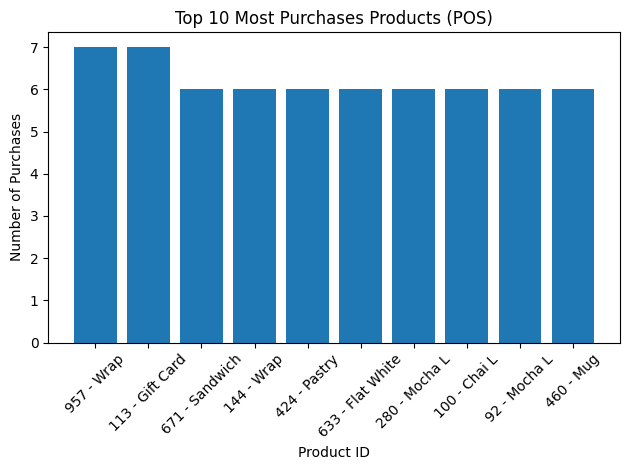

In [770]:
plt.figure()
plt.bar(labels, top_10_products.values)
plt.title("Top 10 Most Purchases Products (POS)")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


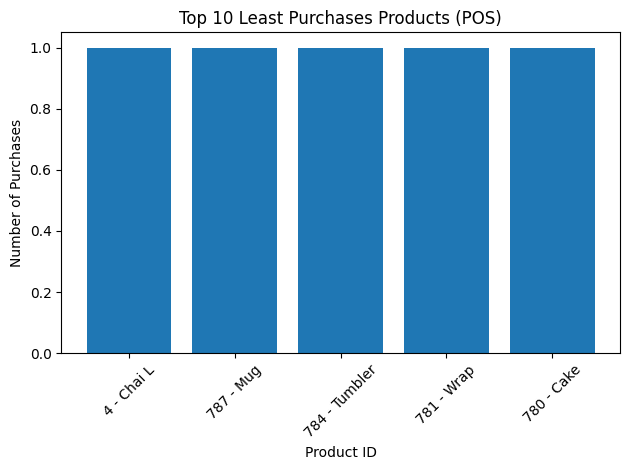

In [771]:
plt.figure()
plt.bar(labels_least, least_purchases_product.values)
plt.title("Top 10 Least Purchases Products (POS)")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


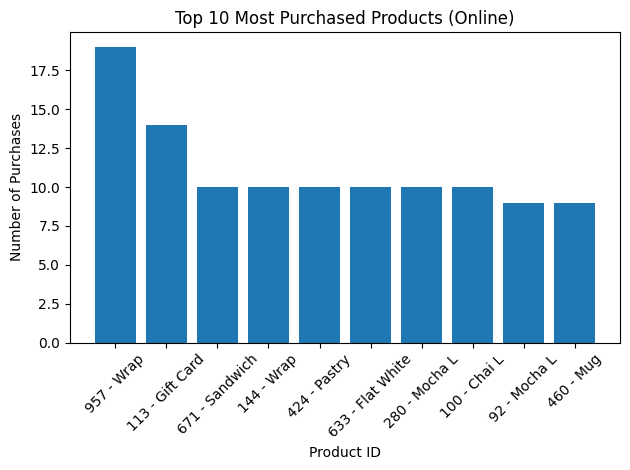

In [772]:
plt.figure()
plt.bar(labels_online, top_10_products_online.values)
plt.title("Top 10 Most Purchased Products (Online)")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


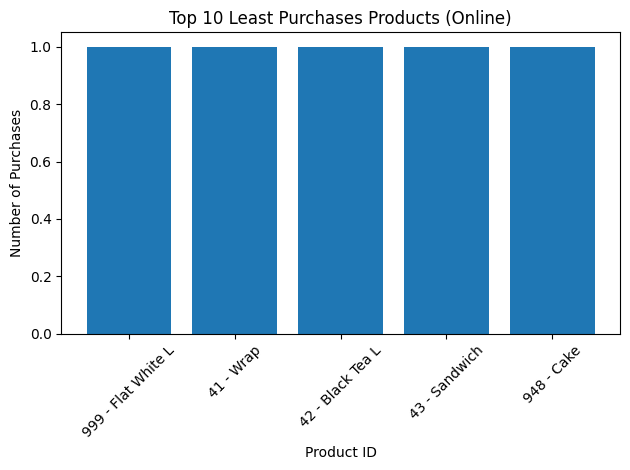

In [773]:
plt.figure()
plt.bar(labels_least_online, least_purchase_product_online.values)
plt.title("Top 10 Least Purchases Products (Online)")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [774]:
# Sales Comparision by Location
pos_purchases_by_location = pos_transactions_line_merged.groupby("store_id").size()
online_purchases_by_location = online_orders.groupby("store_id").size()


In [775]:
print("Number of Purchases by Store (POS)")
for i, (store_id, total) in enumerate(pos_purchases_by_location.items(), start=1):
    print(f"{i}. Store ID {store_id}: {total} purchases")

print("\nNumber of Purchases by Store (Online)")
for i, (store_id, total) in enumerate(online_purchases_by_location.items(), start=1):
    print(f"{i}. Store ID {store_id}: {total} purchases")


Number of Purchases by Store (POS)
1. Store ID 1: 649 purchases
2. Store ID 2: 633 purchases
3. Store ID 3: 541 purchases
4. Store ID 4: 619 purchases
5. Store ID 5: 550 purchases

Number of Purchases by Store (Online)
1. Store ID 1: 399 purchases
2. Store ID 2: 384 purchases
3. Store ID 3: 412 purchases
4. Store ID 4: 407 purchases
5. Store ID 5: 398 purchases


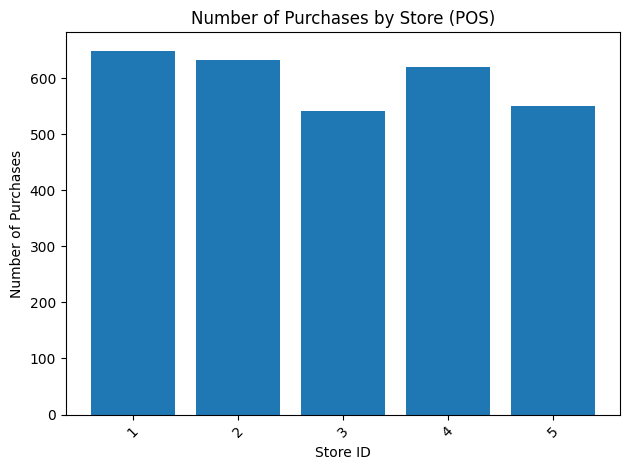

In [776]:
plt.figure()
plt.bar(pos_purchases_by_location.index.astype(str), pos_purchases_by_location.values)
plt.title("Number of Purchases by Store (POS)")
plt.xlabel("Store ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


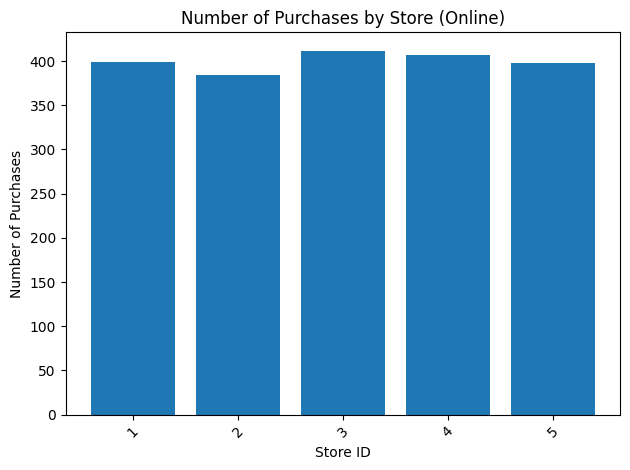

In [777]:
plt.figure()
plt.bar(online_purchases_by_location.index.astype(str), online_purchases_by_location.values)
plt.title("Number of Purchases by Store (Online)")
plt.xlabel("Store ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [778]:
pos_sales_channel = pos_transactions_line_merged.groupby("order_channel")["amount_received"].sum()
pos_sales_store = pos_transactions_line_merged.groupby("store_id")["amount_received"].sum()
pos_sales_product = pos_transactions_line_merged.groupby("product_id")["amount_received"].sum()
pos_sales_time = pos_transactions_line_merged.groupby("time_range")["amount_received"].sum()


C:\Users\kumbi\AppData\Local\Temp\ipykernel_25476\3869932874.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_sales_time = pos_transactions_line_merged.groupby("time_range")["amount_received"].sum()


In [779]:
# How does loyalty programme affect customer spend, visit frequency, and channel preference
# Tracks all online members visits 
average_discount_by_online_customer = online_merged.groupby('online_customer_id')['discount_amount'].mean()
average_discount_by_channel_preferance = online_merged.groupby('sales_channel')['discount_amount'].mean()
average_discount = online_merged['discount_amount'].mean()

visit_frequency_of_online_customers = online_merged.groupby('email').size()

visit_per_online_customer = online_merged[['email','sales_channel','discount_amount','delivery_fee']].copy()
visit_per_online_customer['points'] = loyalty_points_activity['points']
visit_per_online_customer['vists'] = visit_per_online_customer['email'].map(visit_frequency_of_online_customers)
visit_per_online_customer.head()
visit_per_online_customer.to_csv('../results/visit_per_online_customer.csv',index=False)

In [780]:
visit_per_online_customer.head(5)

,email,sales_channel,discount_amount,delivery_fee,points,vists
0,danielle.johnson@example.com,Web,1.84,0.00,6,4
1,danielle.johnson@example.com,Mobile App,0.76,3.52,-14,4
2,danielle.johnson@example.com,Web,1.23,3.77,6,4
3,danielle.johnson@example.com,Mobile App,1.19,1.32,-19,4
4,robert.cole@example.com,Web,0.80,3.39,14,3


In [781]:
# How does loyalty programme affect customer spend, visit frequency, and channel preference
# Tracks the number of visits for each loyal pos member
visit_frequency_of_pos_customers = pos_merged_with_members.groupby('email').size()

visit_per_pos_customer = pos_merged_with_members[['email','order_channel']].copy()
visit_per_pos_customer['vists'] = visit_per_pos_customer['email'].map(visit_frequency_of_online_customers)
visit_per_pos_customer.head()
visit_per_pos_customer.to_csv('../results/visit_per_pos_customer.csv',index=False)

In [782]:
# 1. Combine all visit counts across both platforms
all_visits = pandas.concat([visit_frequency_of_pos_customers, visit_frequency_of_online_customers])
# 2. Group by email again to sum visits if a customer is in both POS and Online
total_visit_freq = all_visits.groupby('email').sum()

# 3. Now map using the integrated frequency
visit_per_pos_customer['vists'] = visit_per_pos_customer['email'].map(total_visit_freq)

In [783]:
# Removing the IDs of the loyal customers 
ids_to_remove = ['3001.0', '3002.0', '3003.0', '3004.0', '3005.0']
non_loyal_customers = pos_transactions_line_merged[
    ~pos_transactions_line_merged['loyalty_member_id'].isin(ids_to_remove)
]

In [784]:
avg_loyal_customer_spend = pos_transactions_line_merged.groupby(
    'loyalty_member_id')['amount_received'].mean()
total_loyal_customer_spend = pos_transactions_line_merged.groupby(
    'loyalty_member_id')['amount_received'].sum()
avg_non_loyal_spend = non_loyal_customers['amount_received'].mean()
total_non_loyal_spend = non_loyal_customers['amount_received'].sum()


In [785]:
# Aggregate loyal customer metrics
overall_avg_loyal_spend = avg_loyal_customer_spend.mean()
overall_total_loyal_spend = total_loyal_customer_spend.sum()
overall_avg_non_loyal_spend = non_loyal_customers.groupby(
    'loyalty_member_id'
)['amount_received'].mean().mean()

overall_total_non_loyal_spend = non_loyal_customers['amount_received'].sum()

print("Customer Spend Summary\n")

print("Loyal Customers")
print(f"• Total Spend: ${overall_total_loyal_spend:,.2f}")
print(f"• Average Spend per Customer: ${overall_avg_loyal_spend:,.2f}\n")

print("Non-Loyal Customers")
print(f"• Total Spend: ${total_non_loyal_spend:,.2f}")
print(f"• Average Spend per Transaction: ${avg_non_loyal_spend:,.2f}")


Customer Spend Summary

Loyal Customers
• Total Spend: $17,531.61
• Average Spend per Customer: $9.12

Non-Loyal Customers
• Total Spend: $27,358.79
• Average Spend per Transaction: $9.14


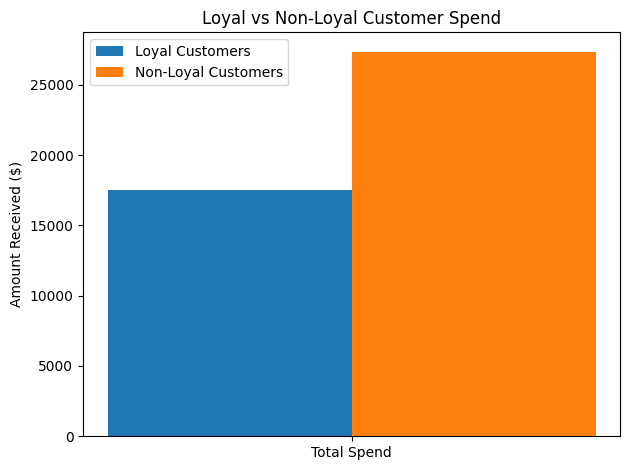

In [786]:

labels = ['Total Spend']
loyal_values = [
    overall_total_loyal_spend,
]
non_loyal_values = [
    overall_total_non_loyal_spend,
]

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, loyal_values, width)
plt.bar(x + width/2, non_loyal_values, width)

plt.xticks(x, labels)
plt.ylabel('Amount Received ($)')
plt.title('Loyal vs Non-Loyal Customer Spend')
plt.legend(['Loyal Customers', 'Non-Loyal Customers'])

plt.tight_layout()
plt.show()


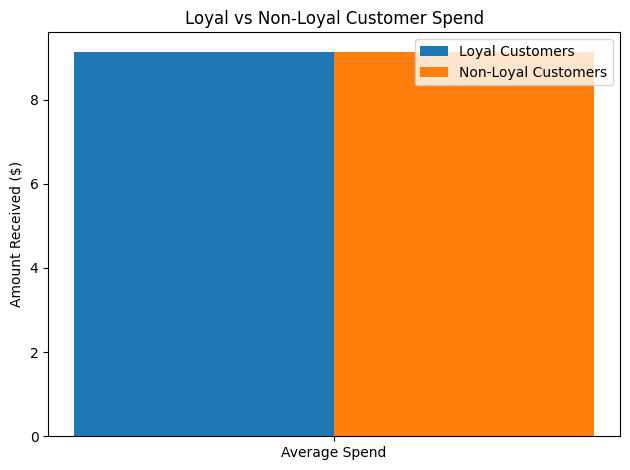

In [787]:

labels = ['Average Spend']
loyal_values = [
    avg_loyal_customer_spend.mean(),
]
non_loyal_values = [
    avg_non_loyal_spend,
]

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, loyal_values, width)
plt.bar(x + width/2, non_loyal_values, width)

plt.xticks(x, labels)
plt.ylabel('Amount Received ($)')
plt.title('Loyal vs Non-Loyal Customer Spend')
plt.legend(['Loyal Customers', 'Non-Loyal Customers'])

plt.tight_layout()
plt.show()


In [788]:
loyal_visits = pos_merged_with_members.shape[0]
non_loyal_visits = non_loyal_customers.shape[0]
print("Customer Visit Summary\n")

print("Loyal Customers")
print(f"• Total Visits: {loyal_visits:,}")

print("\nNon-Loyal Customers")
print(f"• Total Visits: {non_loyal_visits:,}")

print("\nInsight")
if loyal_visits > non_loyal_visits:
    print("• Loyal customers visit more frequently than non-loyal customers.")
else:
    print("• Non-loyal customers visit more frequently than loyal customers.")


Customer Visit Summary

Loyal Customers
• Total Visits: 633

Non-Loyal Customers
• Total Visits: 2,992

Insight
• Non-loyal customers visit more frequently than loyal customers.


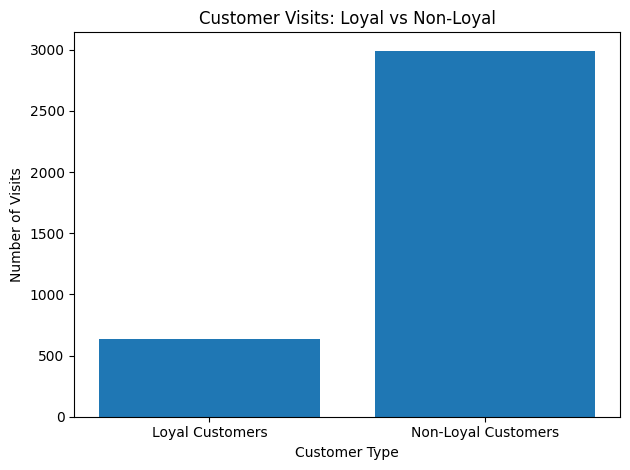

In [789]:
labels = ['Loyal Customers', 'Non-Loyal Customers']
visits = [loyal_visits, non_loyal_visits]

plt.figure()
plt.bar(labels, visits)
plt.title("Customer Visits: Loyal vs Non-Loyal")
plt.xlabel("Customer Type")
plt.ylabel("Number of Visits")
plt.tight_layout()
plt.show()


In [790]:
channel_preference_loyal_customers = pos_merged_with_members.groupby('order_channel').size()
channel_preference_non_loyal_customers = non_loyal_customers.groupby('order_channel').size()

print("Ordering Channel Preference Summary\n")

# Loyal customers
print("Loyal Customers: Channel Usage")
for channel, count in channel_preference_loyal_customers.items():
    print(f"• {channel}: {count} orders")

print("\n")

# Non-loyal customers
print("Non-Loyal Customers: Channel Usage")
for channel, count in channel_preference_non_loyal_customers.items():
    print(f"• {channel}: {count} orders")


Ordering Channel Preference Summary

Loyal Customers: Channel Usage
• Click-and-Collect: 307 orders
• In-Store: 326 orders


Non-Loyal Customers: Channel Usage
• Click-and-Collect: 1417 orders
• In-Store: 1575 orders


In [791]:
pos_merged_with_members['customer_type'] = 'Loyal'
non_loyal_customers['customer_type'] = 'Non-Loyal'

combined_df = pandas.concat([
    pos_merged_with_members[['order_channel', 'customer_type']],
    non_loyal_customers[['order_channel', 'customer_type']]
])


In [792]:
channel_crosstab = pandas.crosstab(
    combined_df['customer_type'],
    combined_df['order_channel'],
    margins=True
)


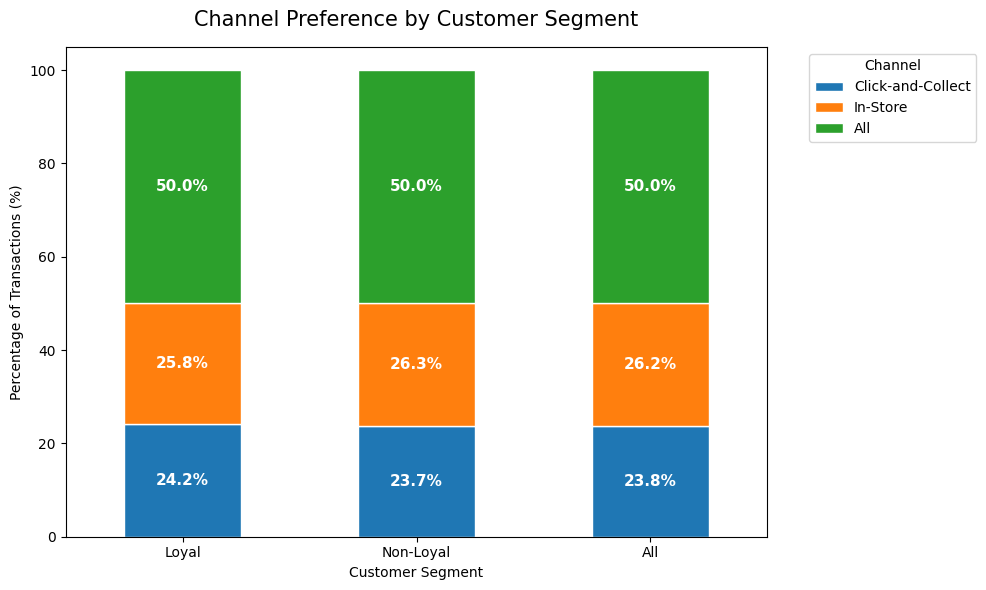

In [793]:
channel_crosstab_pct = channel_crosstab.div(channel_crosstab.sum(axis=1), axis=0) * 100

ax = channel_crosstab_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='white'
)

plt.title("Channel Preference by Customer Segment", fontsize=15, pad=15)
plt.ylabel("Percentage of Transactions (%)")
plt.xlabel("Customer Segment")
plt.xticks(rotation=0)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')

# For the percentage labels 
for i, customer_type in enumerate(channel_crosstab_pct.index):
    cumulative = 0
    for value in channel_crosstab_pct.loc[customer_type]:
        if value > 0:
            plt.text(
                i,
                cumulative + value / 2,
                f"{value:.1f}%",
                ha="center",
                va="center",
                fontsize=11,
                fontweight="bold",
                color="white"
            )
            cumulative += value

plt.tight_layout()
plt.show()


In [794]:
# Which products and stores are most profitable, and which need attention? Actutal Profits based on unit_price and line_discount
profit_store = pos_transactions_line_merged.groupby('store_id')['amount_received'].sum()
profit_product = pos_transactions_line.groupby('product_name')['amount_received'].sum()

In [795]:
# Store-level profitability 
print("Store Profitability Summary")

print("\n Top 5 Most Profitable Stores ($):")
print(profit_store.sort_values(ascending=False).head(5).to_string())

print("\n Bottom 5 Least Profitable Stores (Need Attention):")
print(profit_store.sort_values(ascending=True).head(5).to_string())


Store Profitability Summary

 Top 5 Most Profitable Stores ($):
store_id
1    6079.30
2    5811.53
4    5484.78
5    5002.76
3    4980.42

 Bottom 5 Least Profitable Stores (Need Attention):
store_id
3    4980.42
5    5002.76
4    5484.78
2    5811.53
1    6079.30


In [796]:
# Product-level profitability 
print("\n Product Profitability Summary")

print("\n Top 3 Most Profitable Products ($):")
print(profit_product.sort_values(ascending=False).head(3).to_string())

print("\n Bottom 3 Least Profitable Products (Need Attention):")
print(profit_product.sort_values(ascending=True).head(3).to_string())


 Product Profitability Summary

 Top 3 Most Profitable Products ($):
product_name
Tumbler         1382.71
Coffee Beans    1310.97
Wrap            1245.92

 Bottom 3 Least Profitable Products (Need Attention):
product_name
Mocha M        89.64
Cappuccino    114.81
Flat White    122.30


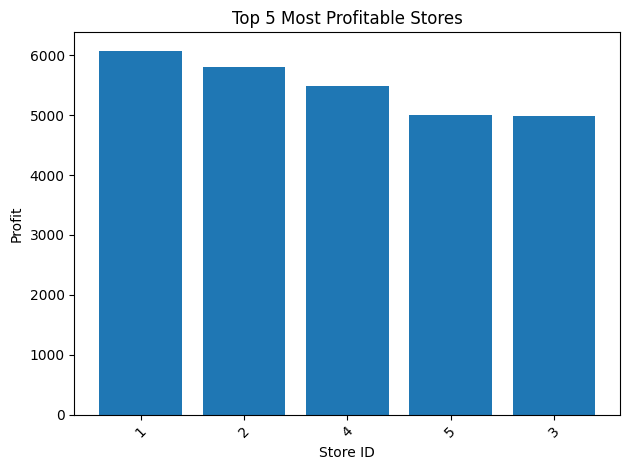

In [797]:
top_5_stores = profit_store.sort_values(ascending=False)

plt.figure()
plt.bar(top_5_stores.index.astype(str), top_5_stores.values)
plt.title("Top 5 Most Profitable Stores")
plt.xlabel("Store ID")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


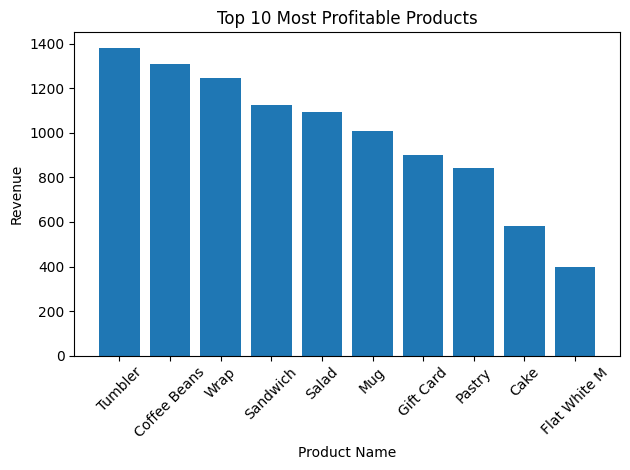

In [798]:
top_10_products = profit_product.sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top_10_products.index.astype(str), top_10_products.values)
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


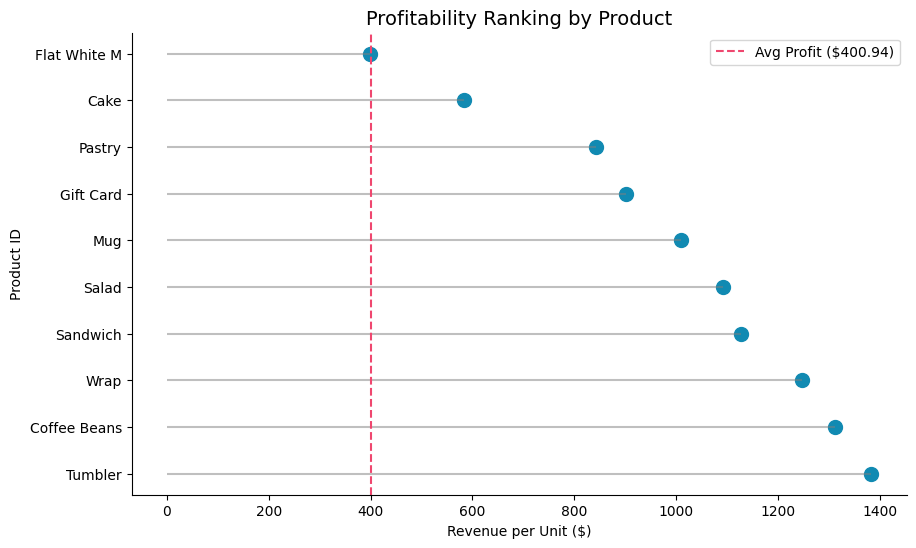

In [799]:
# Calculate the average profit across all categories
mean_profit = profit_product.mean()

plt.figure(figsize=(10, 6))
# Sort for aesthetic appeal
sorted_profit = profit_product.sort_values(ascending=False).head(10)

plt.hlines(y=sorted_profit.index, xmin=0, xmax=sorted_profit.values, color='grey', alpha=0.5)
plt.scatter(y=sorted_profit.index, x=sorted_profit.values, color='#118ab2', s=100)

# Add the "Attention" line
plt.axvline(x=mean_profit, color='#ef476f', linestyle='--', label=f'Avg Profit (${mean_profit:.2f})')

plt.title("Profitability Ranking by Product", fontsize=14)
plt.xlabel("Revenue per Unit ($)")
plt.ylabel("Product ID")
plt.legend()
sns.despine()
plt.show()

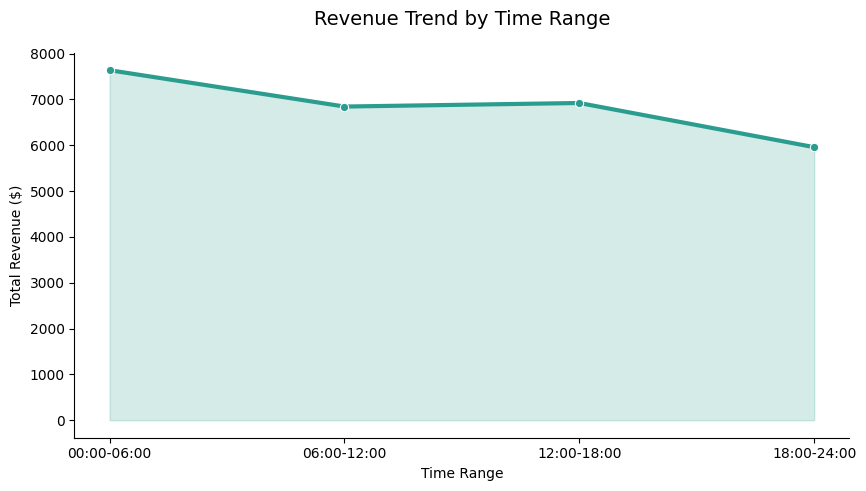

In [800]:
plt.figure(figsize=(10, 5))
# Converting categorical month to numeric for a smooth line
sns.lineplot(x=pos_sales_time.index, y=pos_sales_time.values, marker='o', color='#2a9d8f', linewidth=3)
plt.fill_between(pos_sales_time.index, pos_sales_time.values, color='#2a9d8f', alpha=0.2)

plt.title("Revenue Trend by Time Range", fontsize=14, pad=20)
plt.ylabel("Total Revenue ($)")
plt.xlabel("Time Range")
sns.despine()
plt.show()

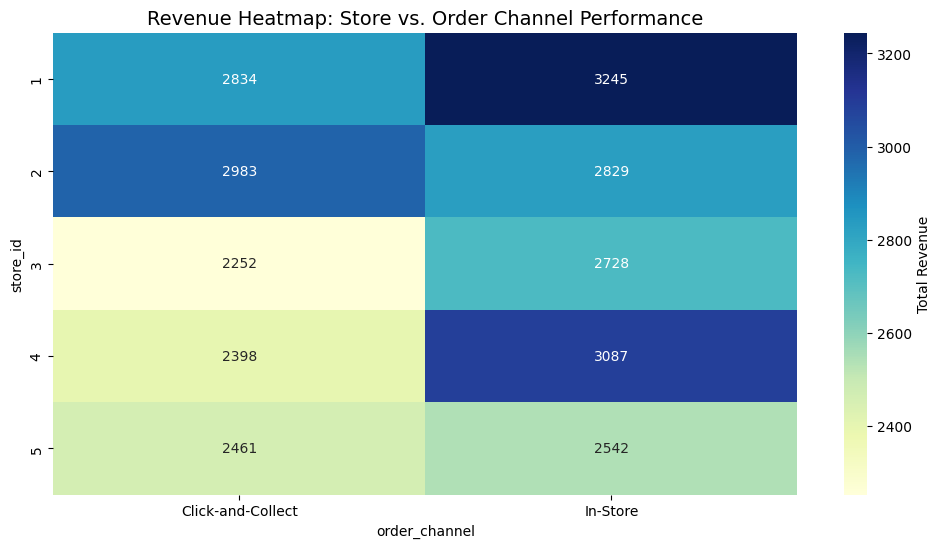

In [801]:
store_category_profit = pos_transactions_line_merged.pivot_table(
    index='store_id', 
    columns='order_channel', 
    values='amount_received', 
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(store_category_profit, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Revenue'})

plt.title("Revenue Heatmap: Store vs. Order Channel Performance", fontsize=14)
plt.show()

In [802]:
product_time = (
    pos_transactions_line_merged
        .groupby(["product_id", "time_range"])
        .agg(
            total_revenue=("amount_received", "sum"),
            transaction_count=("store_id", "count")
        )
        .reset_index()
)

product_time.head()


C:\Users\kumbi\AppData\Local\Temp\ipykernel_25476\2321087693.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["product_id", "time_range"])


,product_id,time_range,total_revenue,transaction_count
0,5,00:00-06:00,12.98,1
1,5,06:00-12:00,0.00,0
2,5,12:00-18:00,12.98,1
3,5,18:00-24:00,0.00,0
4,6,00:00-06:00,4.10,1


C:\Users\kumbi\AppData\Local\Temp\ipykernel_25476\1225970290.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_range","product_name"])["amount_received"]


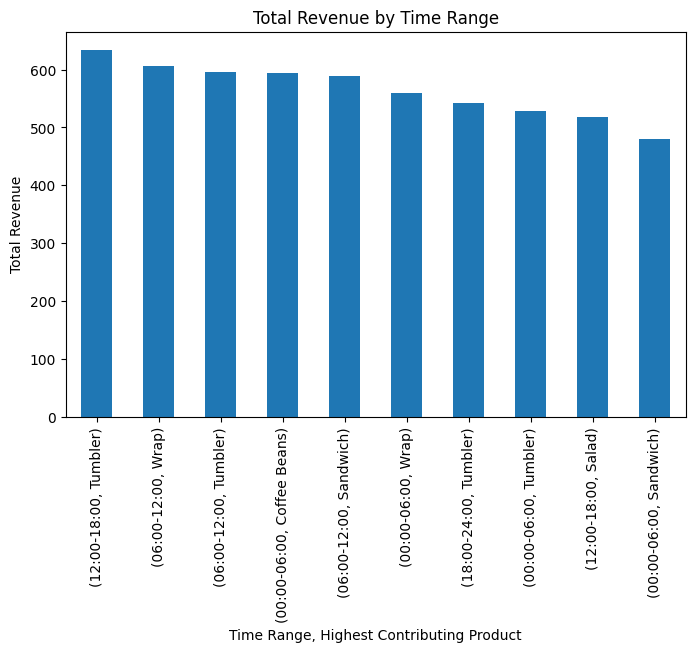

In [803]:
plot_data = (
    pos_transactions_line_merged
        .groupby(["time_range","product_name"])["amount_received"]
        .sum()
        .sort_index()
        .sort_values(ascending=False)
        .head(10)
)

plot_data.plot(kind="bar", figsize=(8,5))
plt.ylabel("Total Revenue")
plt.xlabel("Time Range, Highest Contributing Product")
plt.title("Total Revenue by Time Range")
plt.show()
